## Assignment A3b: Filtering

### John Mays (jkm100)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from A3a_jkm100 import *
from A1b_jkm100 import *
purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

### 1. Filtering

### 1a. A moving average filter

\begin{align*}
y_M[n] &= \frac{1}{M} \sum_{k=0}^{M-1} x[n-k]\\
&=\frac{1}{M}(x[n]+x[n-1]+x[n-2]+\dots + x[0])\\
&= \frac{1}{M}x[n] + \frac{1}{M}(x[n-1]+x[n-2]+\dots + x[0])\\
&= \frac{1}{M}x[n] + \frac{1}{M}\sum_{k=0}^{M-2} x[n-k]\\
\frac{M}{M-1}y_M[n] &= \frac{M}{M-1}\frac{1}{M}x[n] + \frac{M}{M-1}\frac{1}{M}\sum_{k=0}^{M-2} x[n-k]\\
\frac{M}{M-1}y_M[n] &= \frac{M}{M-1}\frac{1}{M}x[n] + y_{M-1}[n-1]\\
y_M[n] &= \frac{1}{M}x[n] + \frac{M-1}{M}y_{M-1}[n-1] \textit{ (now, } \lambda = \frac{M-1}{M}\textit{)}\\
y_M[n] &= (1-\lambda)x[n] + \lambda y_{M-1}[n-1]\\
\therefore y[n] &= (1-\lambda)x[n] + \lambda y[n-1]
\end{align*}

As $\lambda$ becomes smaller, the equation emphasizes $x[n]$, the current value, more, there is less smoothing, and the filtered function essentially becomes more "jagged."  On the other hand, as $\lambda$ becomes larger, the filtered function becomes smoother, as $y[n]$ will be more similar to $y[n-1]$.

### 1b. Implementation

In [2]:
def movingavg(x, lam=0.5):
    y = np.copy(x.astype(float))
    for i in range(np.size(y)):
        if i <= 0:
            y[i] = lam*y[i] + 0
        else:
            y[i] = lam*y[i] + (1-lam)*y[i-1]
    return y

In [3]:
def randprocess(N, sigma=1.0):
    x = np.zeros(N).astype(float, copy=False)
    x[0] = 0
    for i in range(1, np.size(x)):
        x[i] = x[i-1] + np.random.normal(loc=0, scale=sigma)
    return x

In [4]:
def plotsignalandfilter(signal, filtered_signal):
    assert np.size(signal)==np.size(filtered_signal)
    plt.figure(figsize=(8, 5), dpi=72)
    plt.plot(signal, c=purples[6], label="signal")
    plt.plot(filtered_signal, c=purples[3], label="filtered signal")
    plt.xlabel("Indices")
    plt.ylabel("Amplitude")
    plt.title("Original Signal with Filtered Signal")
    plt.legend()
    plt.show()
    return None

In [29]:
x = randprocess(100)
y = movingavg(x, lam=0.25)

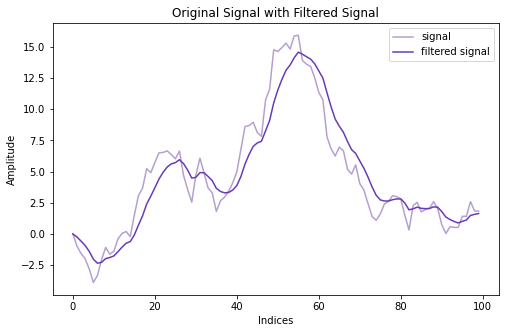

In [30]:
plotsignalandfilter(x, y)

In [27]:
t = np.linspace(0, 250, 251)
sine_signal = noisysignal(t, g= lambda x: sinewave(x, f=0.01),tau=0.0, T=np.size(t), sigma=0.25)
filtered_sine_signal = movingavg(sine_signal, lam=0.10)

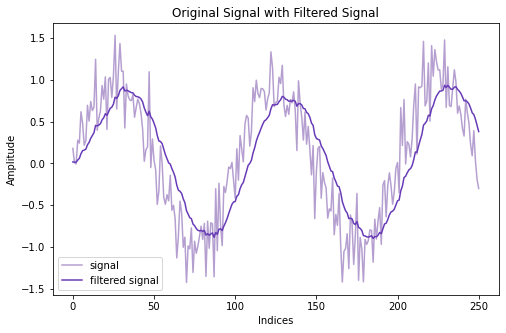

In [28]:
plotsignalandfilter(sine_signal, filtered_sine_signal)

### 1c. System delay

### 2. IIR Filters

### 2a. Implementation


### 2b. First order low- and high-pass IIR filters

### 2c. Second order bandpass filters

### 2d. Characterizing the filter response

### 3. The impulse response function

### 3a. Deriving the impulse response function

### 3b. Impulse responses

### 4. Filtering with convolution

### 4a. Implementing convolution 

### 4b. FIR filtering

### 4c. Using matched filters to detect signals in noise